In [23]:
import pandas as pd
from  sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  f1_score

In [25]:
df = pd.read_csv('BreastCancer.csv')
df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [27]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=24)

In [13]:
max_depths = [2,3,4,5]
scores =  []
for i in max_depths:
    DT = DecisionTreeClassifier(random_state=24 , max_depth=i)
    DT.fit(X_train, Y_train)
    y_pred = DT.predict(X_test)
    scores.append(accuracy_score(Y_test, y_pred))

df1 = pd.DataFrame(scores)
df1.sort_values(0 , ascending = False)


,0
0,0.957143
1,0.947619
2,0.947619
3,0.923810


In [31]:
DT = DecisionTreeClassifier(random_state=24 , max_depth=2, min_samples_split=2)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=24)

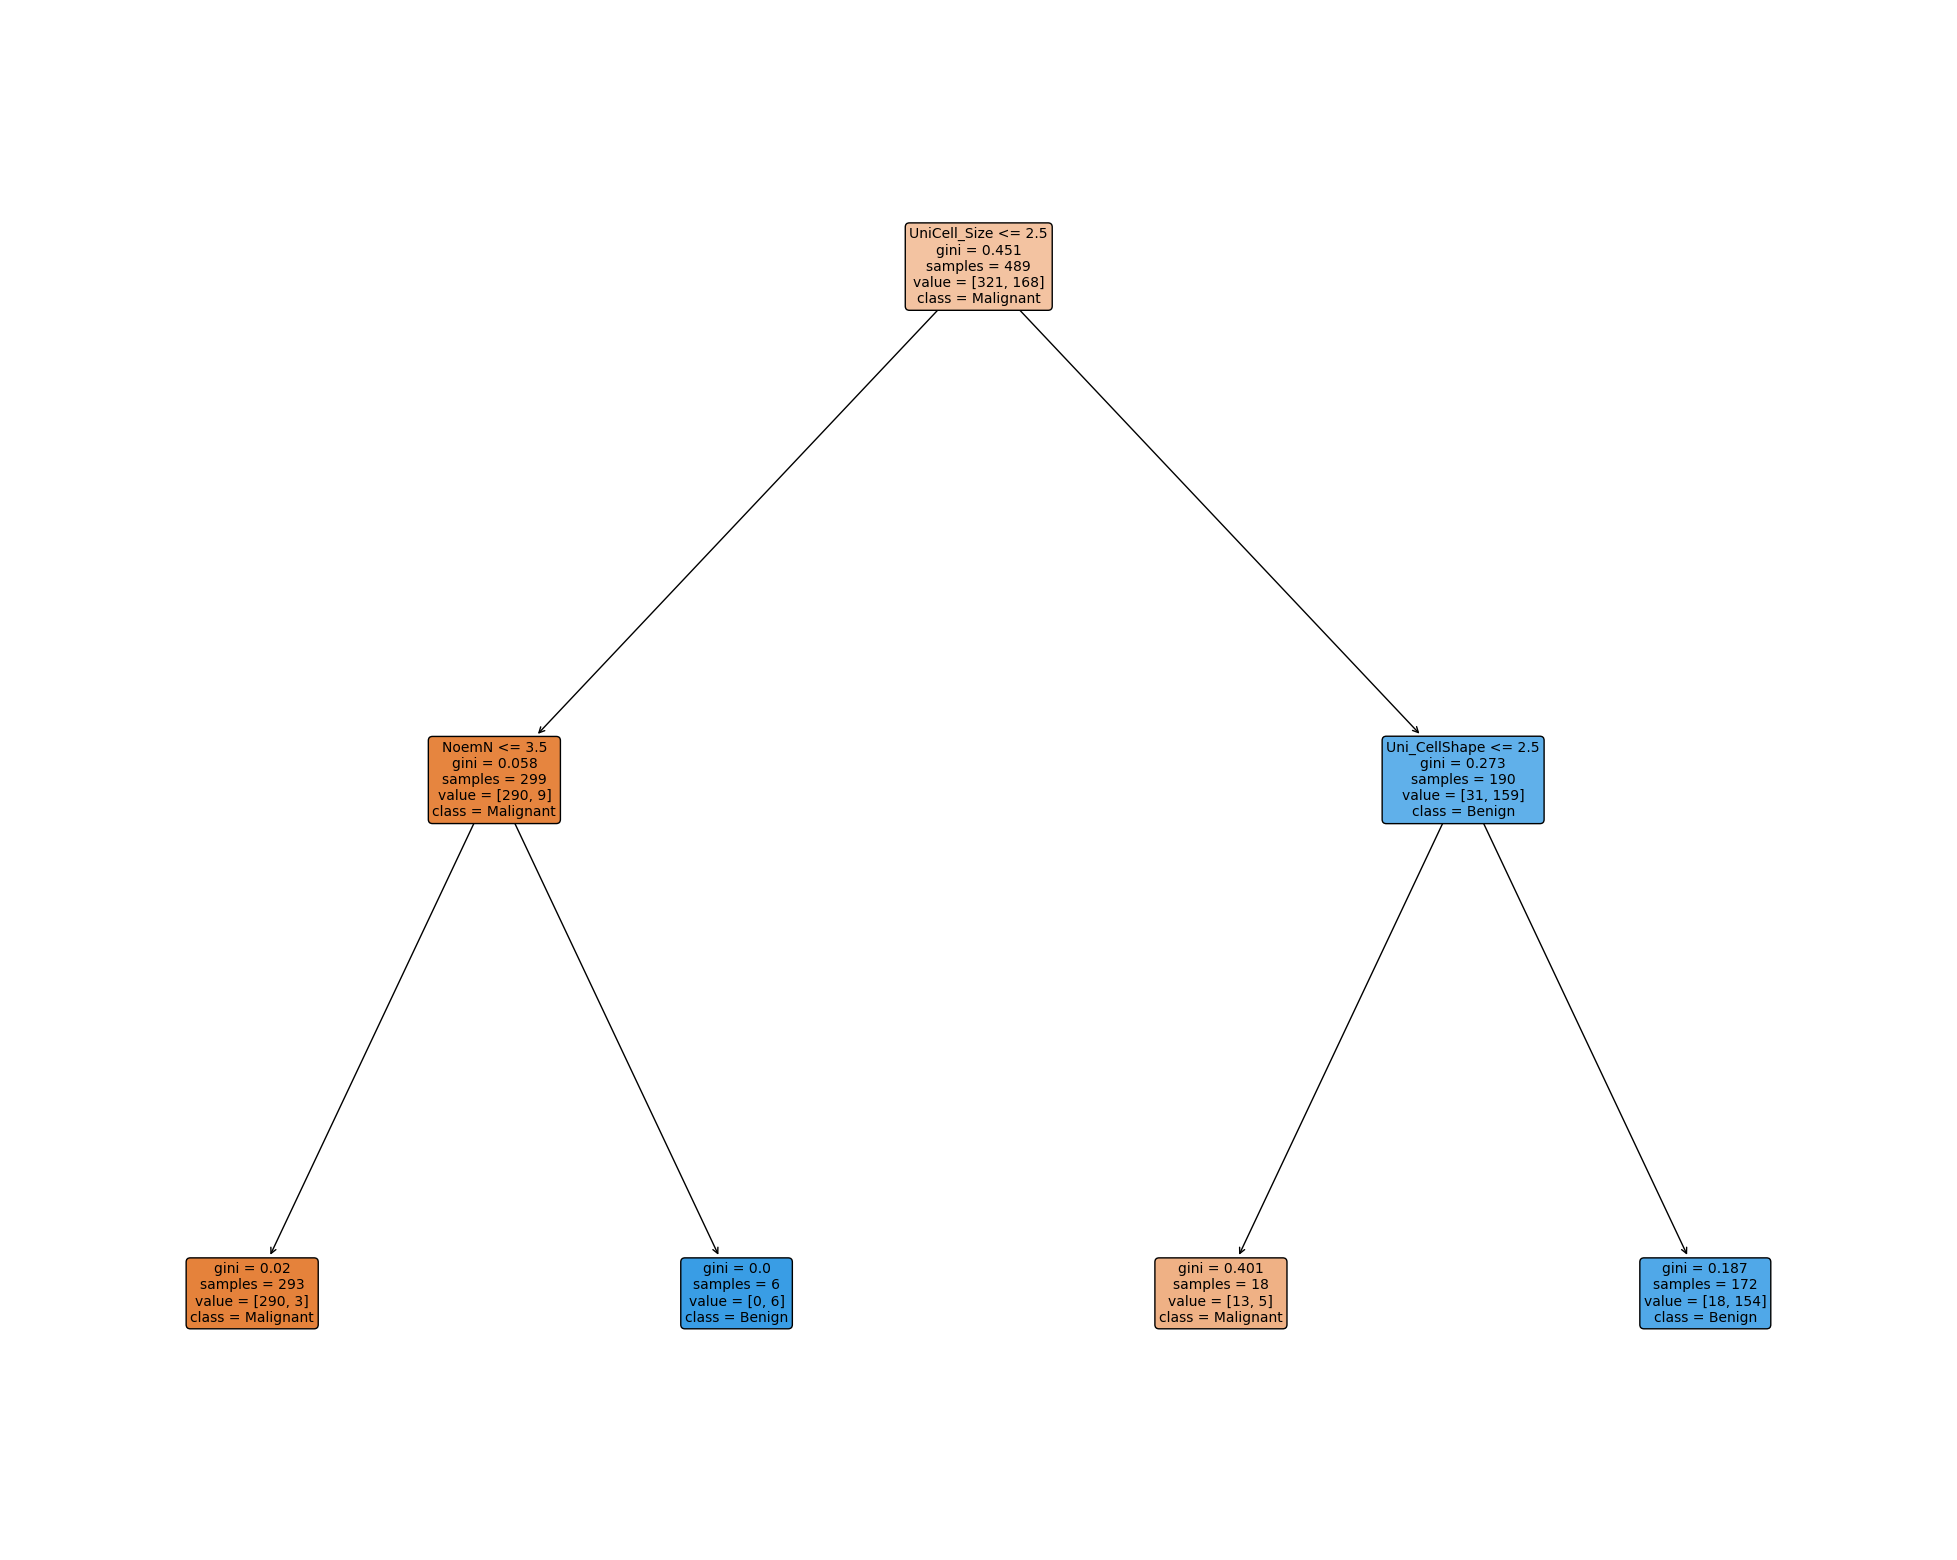

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 20))
plot_tree(
    DT, 
    feature_names=list(df.columns.drop('Class')),  # Corrected list syntax
    class_names=['Malignant', 'Benign'],           # Assuming these are the correct class names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [ ]:
Y_test.value_counts(normalize=True)

In [ ]:
import numpy as np

naive_pred = np.repeat('Benign', len(Y_test))
np.unique(naive_pred, return_counts=True)

 **Naive model Prediction**: Assignning every label as belonging to majority class

Accuracy of any machine learning should be bigger than accuracy score from Naive Model prediction

In [ ]:
# With F1-score
max_depths = [2,3,4,5]
scores =  []
for i in max_depths:
    DT = DecisionTreeClassifier(random_state=24 , max_depth=i)
    DT.fit(X_train, Y_train)
    y_pred = DT.predict(X_test)
    scores.append(f1_score(Y_test, y_pred, pos_label= 'Malignant'))


scores

In [ ]:
#With min-sample-split and min-sample-leaf 

max_depths = [2,3,4,None]
min_sample_split = [2,5,10,20]
min_sample_leaf = [1,5,20]

scores = []

for i in max_depths:
    for j in min_sample_split:
        for k in min_sample_leaf:
            dt = DecisionTreeClassifier(random_state=24, max_depth=i,min_samples_split=j,min_samples_leaf=k)
            dt.fit(X_train,Y_train)
            y_pred = dt.predict(X_test)
            scores.append([i,j,k,f1_score(Y_test,y_pred, pos_label='Malignant')])

In [ ]:
df_res = pd.DataFrame(scores, columns = ['max_depth', 'Split','leaf','F1'])
df_res.sort_values('F1', ascending= False).iloc[0]

In [ ]:
df_res

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(dt,
         feature_names=list(X.columns),
         class_names=['Malignant', 'Benign'],           # Assuming these are the correct class names
        filled=True,
        rounded=True,
        fontsize=10
)
plt.show()